# Insights into Corruption: A Machine Learning Approach to Identify Influencing Factors

**Authors:** Renaud Kilian

**Overview:** This project aims to identify and understand the various socio-economic and political factors influencing the Corruption Perceptions Index (CPI) at a country level. The exploration of these potential indicators might provide valuable insights into developing effective strategies to mitigate corruption and promote transparency and accountability in public sectors globally.


## Exploratory Data Analysis (EDA) Approach

### Data Sources

The necessary data will be sourced from the following:

1. [Corruption Perceptions Index (CPI)](https://www.transparency.org/en/cpi) - Transparency International
2. [World Development Indicators (WDI)](https://databank.worldbank.org/source/world-development-indicators) - World Bank's Open Data

### Corruption Perceptions Index (CPI)
The goal of our EDA is to understand the characteristics, patterns, and potential anomalies in our datasets (CPI and WDI). 




##### Here's the proposed approach:

**Data Quality Check**

Before diving into deeper analysis, we'll first check the quality of our data. This involves:

- Checking for missing values and deciding on the imputation strategy if required.
- Identifying potential outliers and deciding how to handle them.
- Assessing data types to ensure they are appropriate for our analysis.

**Descriptive Statistics**

Next, we'll generate descriptive statistics for our datasets:

- Compute basic statistics like mean, median, mode, standard deviation, and range for each numerical variable.
- For categorical variables, count the number of observations in each category.
- Identify and describe any noticeable patterns or anomalies in these statistics.

**Data Visualization**

Visualizing data can reveal patterns, trends, and relationships that are not obvious from raw data:

- Histograms and box plots for each numerical variable to understand the distribution and identify potential outliers.
- Bar plots for categorical variables to understand the count in each category.
- Scatter plots between the CPI and each of the World Bank Indicators to explore potential correlations.
- Heatmap of the correlation matrix between all variables to identify highly correlated variables.

**Temporal Analysis**

Since the CPI is an annual index:

- Plot the CPI over time to see trends or fluctuations.
- If data from World Bank Indicators is also time-series, explore potential trends and correlations over time.

This approach provides a comprehensive overview of both datasets and helps us make informed decisions on further data cleaning, feature selection, and modeling. It can also guide us in generating hypotheses about the relationships between variables.

In [10]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import imageio

### Corruption Perceptions Index (CPI) by Transparency International

#### Data understanding and preparation

- **Data Source:** [Transparency International's CPI](https://www.transparency.org/en/cpi).
- **Description:** The CPI is a composite index that ranks countries and territories based on their public sector's perceived corruption levels. The index is formed from a combination of surveys and corruption assessments sourced from various respected institutions, making it globally recognized as a leading corruption indicator. The index is scored on a scale of 0 (highly corrupt) to 100 (very clean).
- **Limitations:** The CPI is perception-based and does not directly measure corruption levels. Instead, it compiles data from different sources, capturing the views of business people and country experts on the public sector's corruption levels. As such, the CPI should not be viewed as a definitive judgment of a society's overall corruption levels but as an evaluation of public sector corruption.
- **Collection Methodology:** The CPI is derived from 13 surveys and assessments from 12 independent institutions. These sources typically define corruption as "the misuse of public power for private benefit." A country must have at least three data sources available for a given year to receive a CPI score.
- **Update Frequency:** Transparency International publishes the CPI annually.
- **Use Note:** CPI scores prior to 2012 are not directly comparable with scores from subsequent years due to methodology changes. Thus, these scores will not be utilized in our analysis.


In [23]:
# get Transparency International CPI data from local file
# https://www.transparency.org/en/cpi/2022

CPI = pd.read_csv('data/CPI2022_GlobalResultsTrends.csv', header=0)

display(CPI.head())
display(CPI.tail())
display(CPI.info())
display(CPI.describe())


,Country / Territory,ISO3,Region,Year,CPI score,Rank,Sources,Standard error
0,Afghanistan,AFG,AP,2012,8,NaN,3,3.30
1,Afghanistan,AFG,AP,2013,8,NaN,3,3.30
2,Afghanistan,AFG,AP,2014,12,NaN,4,1.29
3,Afghanistan,AFG,AP,2015,11,NaN,4,3.49
4,Afghanistan,AFG,AP,2016,15,NaN,5,1.74


,Country / Territory,ISO3,Region,Year,CPI score,Rank,Sources,Standard error
1944,Zimbabwe,ZWE,SSA,2018,22,160.0,9,2.290000
1945,Zimbabwe,ZWE,SSA,2019,24,158.0,9,2.307745
1946,Zimbabwe,ZWE,SSA,2020,24,157.0,9,1.352586
1947,Zimbabwe,ZWE,SSA,2021,23,157.0,8,1.518090
1948,Zimbabwe,ZWE,SSA,2022,23,157.0,8,1.532080


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country / Territory  1949 non-null   object 
 1   ISO3                 1949 non-null   object 
 2   Region               1949 non-null   object 
 3   Year                 1949 non-null   int64  
 4   CPI score            1949 non-null   int64  
 5   Rank                 1080 non-null   float64
 6   Sources              1949 non-null   int64  
 7   Standard error       1949 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 121.9+ KB


None

,Year,CPI score,Rank,Sources,Standard error
count,1949.000000,1949.000000,1080.000000,1949.000000,1949.000000
mean,2017.044638,43.034377,89.038889,6.717804,2.886591
std,3.163991,19.270882,51.627007,1.839671,1.554794
min,2012.000000,8.000000,1.000000,3.000000,0.409076
25%,2014.000000,29.000000,45.000000,5.000000,1.845050
50%,2017.000000,38.000000,87.000000,7.000000,2.510000
75%,2020.000000,56.000000,132.500000,8.000000,3.490000
max,2022.000000,92.000000,180.000000,10.000000,12.810000


In [3]:
# CPI.drop(columns=['Rank', 'Standard error', 'Sources', 'Country / Territory'], inplace=True)

# print column names
print(CPI.columns)

# check if ISO3 code and country name have a 1 to 1 match
display(CPI.groupby(['ISO3']).agg({'Country / Territory': 'nunique'}).sort_values(by='Country / Territory', ascending=False).head(5))
display(CPI.groupby(['Country / Territory']).agg({'ISO3': 'nunique'}).sort_values(by='ISO3', ascending=False).head(5))

# # Country / Territory is redundant with ISO3. ISO3 will allow better integration with other dataset 
# # drop country / territory column 
# CPI.drop(columns=['Country / Territory'], inplace=True)

Index(['Country / Territory', 'ISO3', 'Region', 'Year', 'CPI score', 'Rank',
       'Sources', 'Standard error'],
      dtype='object')


,Country / Territory
ISO3,
AFG,1
MUS,1
MYS,1
NAM,1
NER,1


,ISO3
Country / Territory,
Afghanistan,1
Namibia,1
Netherlands,1
New Zealand,1
Nicaragua,1


In [4]:
# add column to CPI for y year trend


0


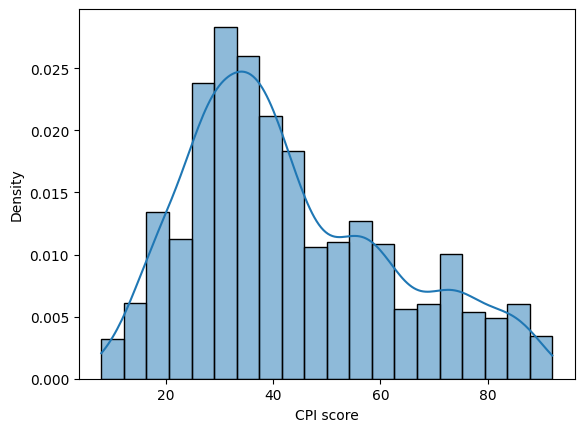

In [5]:
# draw sns.histplot with kde and y axis as percentage
sns.histplot(data=df_full, x="CPI score", kde=True, stat="density", bins=20)
plt.show()


In [6]:
CPI[['ISO3','Year','CPI score']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ISO3       1949 non-null   object
 1   Year       1949 non-null   int64 
 2   CPI score  1949 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 45.8+ KB


compare old cpi model
first and last year
normalise

draw historical map
draw maps
 

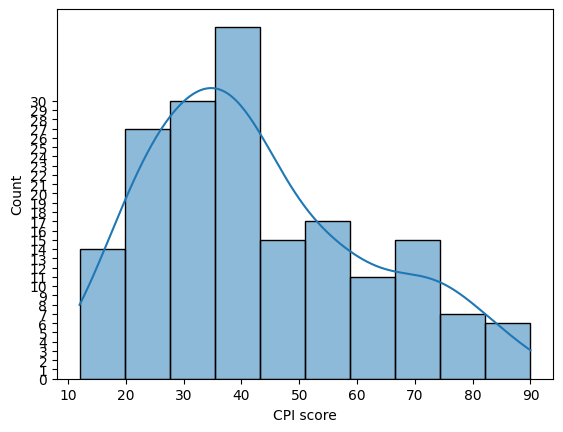

In [7]:
cpi2022 = CPI[CPI['Year'] == 2022]

sns.histplot(data=cpi2022, x='CPI score', kde=True, bins=10)
plt.yticks(range(0, 31, 1))
plt.show()


In [12]:
# draw animated colopeth map of CPI score by country over time
import plotly.express as px

fig = px.choropleth(CPI, locations="ISO3", color="CPI score", hover_name="Country / Territory", animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Blues_r
                    , range_color=[0, 100]
                    , title="Corruption Perception Index (CPI) by Country 2012-2022"
                    , width=800, height=520)
fig.update_layout(margin={"l": 10,"r": 10, "t": 40,  "b": 1})
fig.add_annotation(x=1, y=-0.08, xref='paper', yref='paper', text='Source:<a href="https://www.transparency.org/en/cpi/2022">Transparency International</a>', showarrow=False)

fig.show()

In [22]:
# Generate map gif for Readme.md
# Years to include in the animation
years = range(2012, 2023)

# File paths for the images and final GIF
image_file_paths = [f'images/map_{year}.png' for year in years]
gif_file_path = 'images/animated_map.gif'

# Create an image for each year
for year, file_path in zip(years, image_file_paths):
    df_year = CPI[CPI['Year'] == year]
    fig = px.choropleth(df_year, locations="ISO3", color="CPI score", hover_name="Country / Territory",
                        color_continuous_scale=px.colors.sequential.Blues_r, range_color=[0, 100],
                        title="Corruption Perception Index (CPI) - 2012-2022", width=1600, height=840
                        )
    # title position and font size
    fig.update_layout(title_x=0.5, title_font_size=24, title_y=0.98)
    
    fig.update_layout(margin={"l": 10,"r": 10, "t": 30,  "b": 1})
    fig.add_annotation(x=1, y=0, xref='paper', yref='paper', text='Source:<a href="https://www.transparency.org/en/cpi/2022">Transparency International</a>', showarrow=False, font_size=20)
    fig.add_annotation(x=0, y=0, xref='paper', yref='paper', text='Year: {}'.format(year), showarrow=False, font_size=20)
    
    pio.write_image(fig, file_path)

# Create a GIF from the images
images = [imageio.imread(file_path) for file_path in image_file_paths]
imageio.mimsave(gif_file_path, images, duration=500)

/tmp/ipykernel_45682/3991453838.py:26: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



In [ ]:
########### Interpolate missing values #####################
## TODO: apply to WB indicators not to CPI

# Ensure data is sorted
df = CPI.sort_values(by=['ISO3', 'Year'])

# Create a dataframe with all possible combinations of ISO3 and Year
all_countries = df['ISO3'].unique()
all_years = np.arange(2012, 2023)  # adjust the years as needed
idx = pd.MultiIndex.from_product([all_countries, all_years], names=['ISO3', 'Year'])

full_df = pd.DataFrame(index=idx).reset_index()

# Merge with original dataframe to include all CPI scores
df_full = pd.merge(full_df, df, on=['ISO3', 'Year'], how='left')

# Interpolate the missing CPI scores
df_full['CPI score'] = df_full.groupby('ISO3')['CPI score'].apply(lambda group: group.interpolate())

# Fill remaining missing values
df_full['CPI score'] = df_full.groupby('ISO3')['CPI score'].apply(lambda group: group.ffill().bfill())

# Check if there are still any missing values
print(df_full['CPI score'].isna().sum())


In [ ]:
# Identify missing values
# # create a pivot table with years as columns and countries as rows and CPI score as values
cpi_pivot = CPI.pivot(index='ISO3', columns='Year', values='CPI score')
print(pd.__version__)
# # create an empty dataframe with country, year and CPI score
new_cpi = pd.DataFrame(columns=['ISO3', 'Year', 'CPI']) 
for i in range(2012, 2022):
    rec = cpi_pivot[cpi_pivot[i].isnull()].index
    print(rec)
    new_cpi = new_cpi.append(CPI[CPI['ISO3'].isin(rec) & (CPI['Year'] == i)])
# drop record from Fiji in CPI data
# CPI=CPI[CPI['ISO3'] != 'Fji']

new_cpi



1.3.5
Index(['FJI', 'GRD', 'MDV', 'SLB', 'SSD', 'VUT'], dtype='object', name='ISO3')
Index(['FJI', 'GRD', 'MDV', 'SLB', 'VUT'], dtype='object', name='ISO3')
Index(['BRN', 'FJI', 'GNQ', 'GRD', 'MDV', 'SLB', 'VUT'], dtype='object', name='ISO3')
Index(['BHS', 'BRB', 'BRN', 'DMA', 'FJI', 'GNQ', 'GRD', 'LCA', 'MDV', 'SLB',
       'SWZ', 'VCT', 'VUT'],
      dtype='object', name='ISO3')
Index(['FJI', 'GNQ', 'SWZ', 'SYC', 'VUT'], dtype='object', name='ISO3')
Index(['FJI'], dtype='object', name='ISO3')
Index(['FJI'], dtype='object', name='ISO3')
Index(['FJI'], dtype='object', name='ISO3')
Index(['FJI'], dtype='object', name='ISO3')
Index(['BRN'], dtype='object', name='ISO3')


,ISO3,Year,CPI,Region,CPI score,Rank,Sources,Standard error


In [ ]:
# set 1y-delta column as the difference between current and previous CPI score for each country
CPI['1y-delta'] = CPI.groupby('Country / Territory')['CPI score'].diff()

In [ ]:
# pivot CPI data by year
CPI_pivot = CPI.pivot(index='ISO3', columns='Year', values='CPI score')

# CPI_pivot['delta-10']=CPI_pivot[2022]-CPI_pivot[2012]
CPI_pivot['delta-Max']=CPI_pivot.max(axis=1)-CPI_pivot.min(axis=1)
CPI_pivot['delta-5']=CPI_pivot[2022]-CPI_pivot[2017]
CPI_pivot['delta-3']=CPI_pivot[2022]-CPI_pivot[2019]
CPI_pivot['delta-1']=CPI_pivot[2022]-CPI_pivot[2021]
# drop columns 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021
CPI_pivot.drop(columns=[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], inplace=True)
# rename column 2022 to CPI
CPI_pivot.rename(columns={2022: 'CPI'}, inplace=True)
# show na values
print(CPI_pivot[CPI_pivot.isna().any(axis=1)])
# drop na values
CPI_pivot.dropna(inplace=True)
CPI_pivot.reset_index(inplace=True)
print(CPI_pivot)

# group CPI by ISO3 calculate mean,min,max, year-1, year-3, year-5 and year-10 CPS Score
CPI_group = CPI.groupby(['ISO3']).agg({'CPI score': ['mean', 'std', 'var', 'skew', 'quantile']})
CPI_group.columns = CPI_group.columns.map('_'.join)
CPI_group.reset_index(inplace=True)
print(CPI_group)

# merge CPI_pivot and CPI_group
CPI_merge = pd.merge(CPI_pivot, CPI_group, on='ISO3', how='inner')
CPI_merge.correlation = CPI_merge.corr(method='pearson')

Year   CPI  delta-Max  delta-5  delta-3  delta-1
ISO3                                            
BRN    NaN        8.0      NaN      NaN      NaN
FJI   53.0        2.0      NaN      NaN     -2.0
Year ISO3   CPI  delta-Max  delta-5  delta-3  delta-1
0     AFG  24.0       16.0      9.0      8.0      8.0
1     AGO  33.0       18.0     14.0      7.0      4.0
2     ALB  36.0        8.0     -2.0      1.0      1.0
3     ARE  67.0        5.0     -4.0     -4.0     -2.0
4     ARG  38.0       13.0     -1.0     -7.0      0.0
..    ...   ...        ...      ...      ...      ...
174   VUT  48.0        5.0      5.0      2.0      3.0
175   YEM  16.0        9.0      0.0      1.0      0.0
176   ZAF  43.0        3.0      0.0     -1.0     -1.0
177   ZMB  33.0        5.0     -4.0     -1.0      0.0
178   ZWE  23.0        4.0      1.0     -1.0      0.0

[179 rows x 6 columns]
    ISO3  CPI score_mean  CPI score_std  CPI score_var  CPI score_skew   
0    AFG       14.545455       4.698162      22.072727    

ValueError: could not convert string to float: 'AFG'

In [ ]:
#  create a model to cluster countries based on every feature in cpi_merge
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to samples
pipeline.fit(CPI_merge.drop(columns=['ISO3']))

# Calculate the cluster labels: labels
labels = pipeline.predict(CPI_merge.drop(columns=['ISO3']))

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'ISO3': CPI_merge['ISO3']})


# Display ct
df.sort_values(by=['labels'], inplace=True)


/home/kilren/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<!-- create categories -->

/tmp/ipykernel_686/4233291069.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


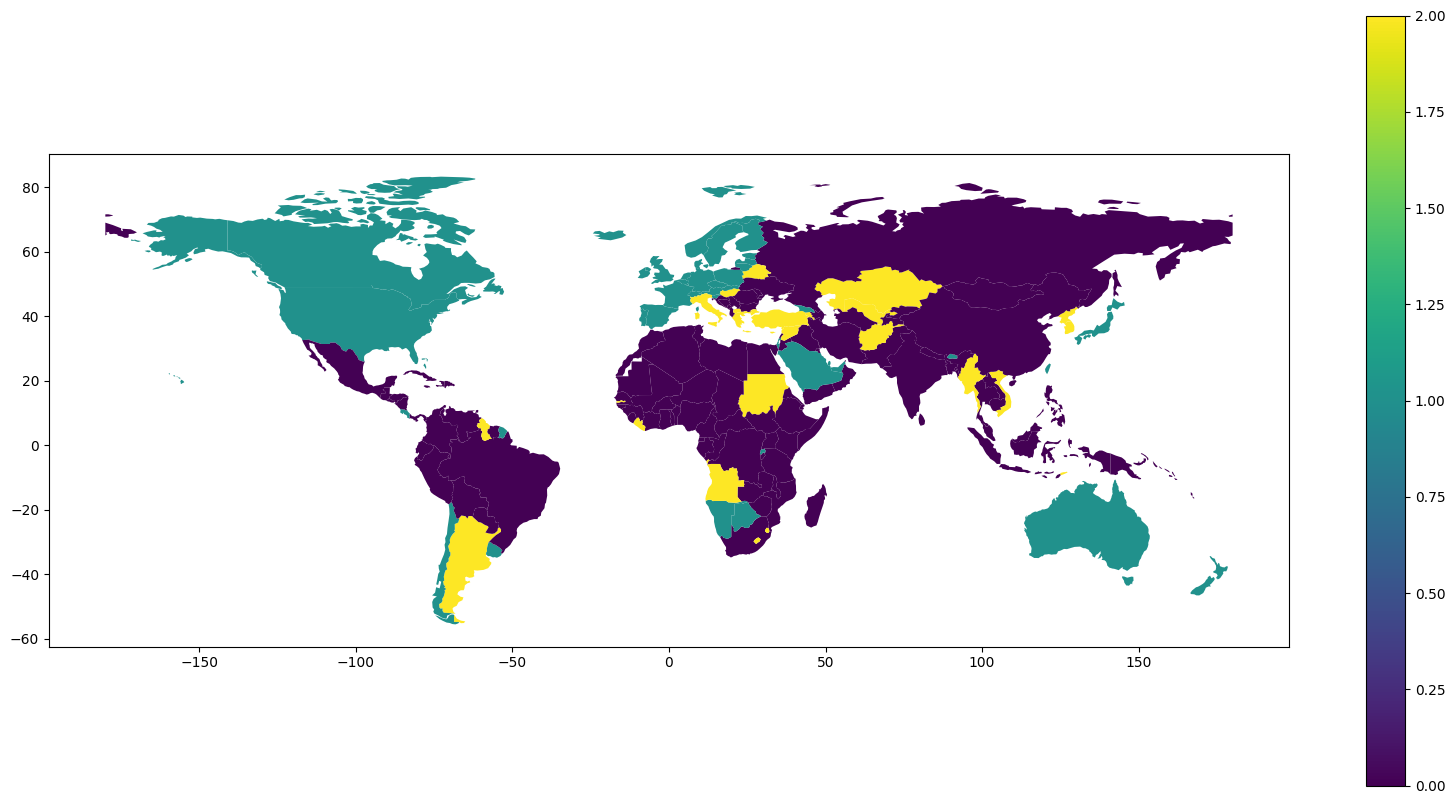

In [ ]:
# show map with cluster
import geopandas as gpd
import matplotlib.pyplot as plt

# read shape file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.rename(columns={'iso_a3': 'ISO3'}, inplace=True)


# merge world and df
world_merge = pd.merge(world, df, on='ISO3', how='inner')
world_merge

# plot map
fig, ax = plt.subplots(figsize=(20, 10))
world_merge.plot(column='labels', ax=ax, legend=True)
plt.show()


In [ ]:

# identify countries with highest variation in CPI score over the years a 3 year period

# identify pivotal year for those countries with highest variation in CPI score over the years a 3 year period
# select 10 most increased and 10 most decreased countries







Index(['Country / Territory', 'ISO3', 'Region', 'Year', 'CPI score'], dtype='object')


,Year,CPI score
count,1949.000000,1949.000000
mean,2017.044638,43.034377
std,3.163991,19.270882
min,2012.000000,8.000000
25%,2014.000000,29.000000
50%,2017.000000,38.000000
75%,2020.000000,56.000000
max,2022.000000,92.000000


### World Bank Indicators - World Bank's Open Data

- **Data Source:** [World Bank's Open Data](https://databank.worldbank.org/source/world-development-indicators)
- **Description:** The World Bank Indicators encompass a wide range of economic, social, and environmental data about World Bank member countries and other economies. These indicators include metrics like GDP, education, health, labor, trade, and numerous others, offering comprehensive insights into various development aspects globally. Each indicator has a specific scale relevant to the data it presents.
- **Limitations:** While these indicators offer valuable insights, they come with certain limitations, including varying data quality across countries, potential errors due to statistical estimation techniques, and some data being outdated or missing for certain countries or years.
- **Collection Methodology:** The World Bank sources data from various national and international sources, including statistical publications and databases maintained by countries, UN agencies, various international and regional organizations, and academic sources. The data undergoes rigorous quality checks before being made available on the platform.
- **Update Frequency:** The World Bank continuously updates its datasets as fresh data becomes available, though the frequency can vary depending on the data source and indicator.


In [ ]:
# get list of indicators
indicators = pd.read_csv('data/Series.csv', header=0)
ind=[]
for i in indicators.itertuples():
    ind.append({i[1]: i[3]})

WDI = pd.read_csv('data/WDIData.csv')
WDI.head()



,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.196986,17.597176,18.034249,18.345878,18.695306,19.149942,19.501837,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.580066,6.786218,6.941323,7.096843,7.254828,7.460783,7.599289,NaN,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.857526,38.204173,38.303515,38.421813,38.482409,38.692053,38.793983,NaN,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.824950,33.744405,38.733352,40.092163,42.880977,44.073912,45.609604,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.485006,16.329765,24.372504,25.153292,27.227391,29.383000,30.163364,NaN,NaN,NaN


In [ ]:
# drop column ''Unnamed: 67'
WDI.drop(columns=['Unnamed: 67'], inplace=True)
# drop each records when indicator contains ".STD.ERR" or ".RNK" or ".SRC"
WDI = WDI[~WDI['Indicator Code'].str.contains('.STD.ERR|.RNK|.SRC')] # Standard error, rank, number of source
WDI = WDI[~WDI['Indicator Name'].str.contains('LCU')] # Local Currency Unit


In [ ]:
WDI_unpivot = WDI.melt(ignore_index=True,id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Value')
# remove all year prior 2012
WDI_unpivot = WDI_unpivot[WDI_unpivot['Year'] >= '2012']
WDI_unpivot['Year'] = WDI_unpivot['Year'].astype(int)
# replace 0 with NaN
WDI_unpivot.replace(0, np.nan, inplace=True)
# remove rows with NaN in Value
WDI_unpivot = WDI_unpivot.dropna(subset=['Value'])
# pivot table to get indicator as column
WDI = WDI_unpivot.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Indicator Name', values='Value')


In [ ]:
# Merge CPI and WDI dataframes
WDI_CPI = pd.merge( CPI, WDI,how='inner', left_on=['ISO3','Year'], right_on=['Country Code','Year'])
# # drop columns "Country / Territory" and "ISO3"
# WDI_CPI.drop(columns=['ISO3'], inplace=True)

WDI_CPI.describe()

,Year,CPI score,Rank,Sources,Standard error,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
count,1927.000000,1927.000000,1068.000000,1927.000000,1927.000000,166.000000,1532.000000,1516.000000,1527.000000,1571.000000,...,83.000000,81.000000,81.000000,83.000000,83.000000,81.000000,145.000000,154.000000,1686.000000,1277.000000
mean,2017.045148,42.957447,89.365169,6.724961,2.890290,60.151205,65.886625,57.782058,74.582449,81.473666,...,39.965060,24.938272,13.402469,26.572289,29.534940,20.743210,6.593793,24.128571,38.509015,3140.798747
std,3.164007,19.309827,51.706960,1.838809,1.559488,19.039757,38.392205,41.745361,35.064995,27.732006,...,20.949559,18.317850,10.755893,17.861836,16.761537,16.495014,6.192819,15.178919,16.810759,10719.848157
min,2012.000000,8.000000,1.000000,3.000000,0.409076,17.600000,0.200000,0.100000,0.200000,3.607868,...,2.300000,0.700000,0.400000,0.800000,1.700000,0.400000,0.100000,0.100000,6.300000,100.000000
25%,2014.000000,29.000000,45.000000,5.000000,1.844207,47.150000,26.475000,7.575000,58.350000,65.778378,...,26.150000,8.900000,4.300000,12.000000,16.300000,7.800000,1.900000,12.375000,25.900000,100.000000
50%,2017.000000,38.000000,87.000000,7.000000,2.510000,61.400000,86.100000,73.000000,95.900000,99.400002,...,41.100000,21.000000,10.800000,24.000000,29.700000,18.100000,5.400000,24.300000,36.450000,500.000000
75%,2020.000000,55.500000,134.250000,8.000000,3.490000,73.700000,100.000000,100.000000,100.000000,100.000000,...,53.950000,35.400000,19.100000,38.950000,42.000000,32.100000,8.800000,32.375000,53.675000,1700.000000
max,2022.000000,92.000000,180.000000,10.000000,12.810000,97.500000,100.000000,100.000000,100.000000,100.000000,...,92.100000,77.600000,48.600000,82.700000,81.000000,69.700000,29.700000,76.300000,70.600000,150000.000000


In [ ]:
WDI_CPI


,ISO3,Region,Year,CPI score,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,AFG,AP,2012,8,NaN,23.0,8.2,74.4,69.099998,60.849155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.9,500.0
1,AFG,AP,2013,8,NaN,24.8,9.1,75.7,68.290649,60.566135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.8,500.0
2,AFG,AP,2014,12,NaN,26.1,10.2,77.6,89.500000,86.500511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.7,500.0
3,AFG,AP,2015,11,61.5,27.4,11.1,78.8,71.500000,64.573357,...,80.2,59.2,18.2,66.9,48.4,33.4,8.8,34.8,28.7,500.0
4,AFG,AP,2016,15,NaN,28.6,12.2,79.7,97.699997,97.099358,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.8,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,ZWE,SSA,2018,22,NaN,29.9,6.4,79.1,45.572647,26.617121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.1,10000.0
1923,ZWE,SSA,2019,24,48.0,30.1,6.7,79.1,46.781475,28.404877,...,NaN,NaN,NaN,NaN,NaN,NaN,5.4,33.7,60.3,8600.0
1924,ZWE,SSA,2020,24,NaN,30.4,6.8,78.6,52.747669,37.060249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.5,7700.0
1925,ZWE,SSA,2021,23,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.7,6800.0


In [ ]:
# drop all rows with more than 80% NaN
WDI_CPI2 = WDI_CPI
print(WDI_CPI2.shape)
WDI_CPI2 = WDI_CPI2.dropna(thresh=WDI_CPI2.shape[1]*0.4,axis=0)
print(WDI_CPI2.shape)
WDI_CPI2 = WDI_CPI2.dropna(thresh=WDI_CPI2.shape[0]*.9,axis=1)
print(WDI_CPI2.shape)
WDI_CPI2 = WDI_CPI2.dropna(thresh=WDI_CPI2.shape[1]*0.9,axis=0)
print(WDI_CPI2.shape) #(1495, 527)
WDI_CPI2.head()

#  display nan count for each column
WDI_CPI2.isna().sum().sort_values(ascending=False)


(1927, 1350)
(1592, 1350)
(1592, 404)
(1402, 404)


Gross fixed capital formation (% of GDP)                             122
Gross fixed capital formation (current US$)                          122
Households and NPISHs final consumption expenditure (% of GDP)       109
Households and NPISHs Final consumption expenditure (current US$)    109
General government final consumption expenditure (% of GDP)          107
                                                                    ... 
Mortality rate, infant, male (per 1,000 live births)                   0
Mortality rate, neonatal (per 1,000 live births)                       0
Mortality rate, under-5 (per 1,000 live births)                        0
Mortality rate, under-5, female (per 1,000 live births)                0
ISO3                                                                   0
Length: 404, dtype: int64

In [ ]:

# print columns with name containing "Control of Corruption" or "Rule of Law" or "Government Effectiveness" or "Regulatory Quality" (case insensitive) then drop them
WDI_CPI2.drop(columns=WDI_CPI2.columns[WDI_CPI2.columns.str.contains('Control of Corruption|Rule of Law|Government Effectiveness|Regulatory Quality', case=False)],inplace=True)

# show correlation matrix for WDI_CPI excluding columns 'Year' and non numeric columns
corr = WDI_CPI2.drop(columns=['Year',"Region","ISO3"]).corr()
# corr.style.background_gradient(cmap='coolwarm')
# show correlation to CPI excluding columns 'Year' and non numeric columns and sort by correlation descending
corr_CPI = corr['CPI score'].sort_values(ascending=False, key=lambda col: col.abs())
corr_CPI


CPI score                                                                                   1.000000
Adjusted net national income per capita (current US$)                                       0.819462
GNI per capita, Atlas method (current US$)                                                  0.811768
Domestic general government health expenditure per capita, PPP (current international $)    0.811456
Current health expenditure per capita, PPP (current international $)                        0.808314
                                                                                              ...   
Urban population                                                                           -0.006020
Land area (sq. km)                                                                          0.003933
Agricultural land (sq. km)                                                                 -0.003909
Forest area (sq. km)                                                                       

In [ ]:
# # create prediction model for CPI score using linear regression
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # drop columns 'Year' and non numeric columns
# X = WDI_CPI2.drop(columns=['Year',"Region","ISO3", "CPI score"])


# # fill NaN with mean
# X = X.fillna(X.mean() )

# # create target variable
# y = WDI_CPI2['CPI score']

# # split data into training and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# # create linear regression object
# lr = LinearRegression()

# # fit linear regression object to training data
# lr.fit(X_train, y_train)

# # print score for training data
# print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))

# # print score for test data
# print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# # print mse for test data
# print("MSE: {}".format(mean_squared_error(y_test, lr.predict(X_test))))

# # print rmse for test data
# print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))))

# # print r2 for test data
# print("R2: {}".format(r2_score(y_test, lr.predict(X_test))))


In [ ]:
# # use principal component analysis to reduce dimensionality
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# from sklearn.decomposition import PCA

# # create PCA object
# pca = PCA(n_components=100)

# # fit PCA object to data
# pca.fit(X)
# # transform data to first two principal components
# X_pca = pca.transform(X)
# # split data into training and test data
# X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=42)

# # create linear regression object
# lr = LinearRegression()

# # fit linear regression object to training data
# lr.fit(X_train, y_train)

# # print score for training data
# print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
# # print score for test data
# print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
# # print mse for test data
# print("MSE: {}".format(mean_squared_error(y_test, lr.predict(X_test))))
# # print rmse for test data
# print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))))
# # print r2 for test data
# print("R2: {}".format(r2_score(y_test, lr.predict(X_test))))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.cluster import KMeans
import numpy as np

X = WDI_CPI2.drop(columns=['Year',"Region","ISO3", "CPI score"])


# fill NaN with mean
X = X.fillna(X.mean() )

# create target variable
y = WDI_CPI2['CPI score']

# split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# identify the best prediction model using sklearn pipeline and gridsearchcv with 5-fold cross validation
# create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# create parameter grid
param_grid = [
    {
        'scaler': [StandardScaler(), RobustScaler()], 
        'regressor': [LinearRegression()]
    } ,
    {
        'scaler': [StandardScaler(), RobustScaler()],
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 1, 10, 100]
    },
    {
        'scaler': [StandardScaler(), RobustScaler()],
        'regressor': [Lasso()],
        'regressor__alpha': [0.1, 1, 10, 100]
    },
    {
        'scaler': [StandardScaler(), RobustScaler()],
        'regressor': [ElasticNet()],
        'regressor__alpha': [0.1, 1, 10, 100],
        'regressor__l1_ratio': [0.1, 0.5, 0.9]
    },
    {
        'scaler': [StandardScaler(), RobustScaler()],
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [10, 50, 100, 200],
        'regressor__max_depth': [None, 5, 10, 20, 50, 100],
        'regressor__max_features': ['sqrt', 'log2']
    },
    {
        'scaler': [StandardScaler(), RobustScaler()],
        'regressor': [GradientBoostingRegressor()],
        'regressor__n_estimators': [10, 50, 100, 200],
        'regressor__max_depth': [None, 5, 10, 20, 50, 100],
        'regressor__max_features': ['sqrt', 'log2']
    }
]

# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    # ('feature_selection', SelectKBest()),
    ('regressor', LinearRegression())
])

# Create grid search
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit grid search
best_model = grid.fit(X_train, y_train).best_estimator_
best_model

Fitting 5 folds for each of 234 candidates, totalling 1170 fits


/home/kilren/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.553e+02, tolerance: 2.876e+01
  model = cd_fast.enet_coordinate_descent(
/home/kilren/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.190e+03, tolerance: 2.876e+01
  model = cd_fast.enet_coordinate_descent(
/home/kilren/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

Pipeline(steps=[('scaler', RobustScaler()),
                ('regressor',
                 GradientBoostingRegressor(max_depth=50, max_features='sqrt',
                                           n_estimators=50))])

In [ ]:
# get best_model score
print("Training set score: {:.5f}".format(best_model.score(X_train, y_train)))
print("Test set score: {:.5f}".format(best_model.score(X_test, y_test)))
print("R2: {}".format(r2_score(y_test, best_model.predict(X_test))))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))))


# show 10 worst predictions
y_test_pred = best_model.predict(X_test)
y_test_pred = pd.DataFrame(y_test_pred, columns=['Predicted'])
y_test_pred['Actual'] = y_test.values
y_test_pred['Difference'] = y_test_pred['Actual'] - y_test_pred['Predicted']
y_test_pred['Difference'] = y_test_pred['Difference'].abs()
y_test_pred.sort_values(by='Difference', ascending=False).head(10)




Training set score: 0.99997
Test set score: 0.98572
R2: 0.9857240739090065
RMSE: 2.3036615023997546


,Predicted,Actual,Difference
175,47.101379,36,11.101379
174,69.690610,61,8.690610
177,47.658140,40,7.658140
328,65.528379,72,6.471621
135,21.358543,15,6.358543
79,38.855472,45,6.144528
308,28.173333,34,5.826667
323,53.268199,59,5.731801
21,30.548922,25,5.548922
301,49.514704,44,5.514704


In [ ]:
# show all features sorted by descending importance for best model
feature_importance = pd.DataFrame(best_model.named_steps['regressor'].feature_importances_, index=X.columns, columns=['Importance'])
feature_importance.sort_values(by='Importance', ascending=False).head(50)
fsfssf


In [ ]:
#  add feature selection to best_model
# create parameter grid
param_grid = [
    {
        'scaler': [RobustScaler()],
        'feature_selection': [SelectKBest()],
        'feature_selection__k': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'regressor': [GradientBoostingRegressor()],
        'regressor__n_estimators': [200],
        'regressor__max_depth': [50],
        'regressor__max_features': ['sqrt', 'log2']
    },
    {
        'scaler': [RobustScaler()],
        'feature_selection': [RFE(GradientBoostingRegressor())],
        'feature_selection__n_features_to_select': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
        'regressor': [GradientBoostingRegressor()],
        'regressor__n_estimators': [200],
        'regressor__max_depth': [50],
        'regressor__max_features': ['sqrt', 'log2']
    }
]
# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest()),
    ('regressor', GradientBoostingRegressor())
])

# Create grid search
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit grid search
best_model = grid.fit(X_train, y_train)
best_model.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


Pipeline(steps=[('scaler', RobustScaler()),
                ('feature_selection',
                 RFE(estimator=GradientBoostingRegressor(),
                     n_features_to_select=90)),
                ('regressor',
                 GradientBoostingRegressor(max_depth=50, max_features='sqrt',
                                           n_estimators=200))])

In [ ]:
# get best_model score
print("Training set score: {:.2f}".format(best_model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(best_model.score(X_test, y_test)))
print("MSE: {}".format(mean_squared_error(y_test, best_model.predict(X_test))))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))))
print("R2: {}".format(r2_score(y_test, best_model.predict(X_test))))

# show 10 worst predictions
y_test_pred = best_model.predict(X_test)
y_test_pred = pd.DataFrame(y_test_pred, columns=['Predicted'])
y_test_pred['Actual'] = y_test.values
y_test_pred['Difference'] = y_test_pred['Actual'] - y_test_pred['Predicted']
y_test_pred['Difference'] = y_test_pred['Difference'].abs()
y_test_pred.sort_values(by='Difference', ascending=False).head(10)



Training set score: 1.00
Test set score: 0.98
MSE: 5.583939842012637
RMSE: 2.3630361491125433
R2: 0.9849786940309332


,Predicted,Actual,Difference
175,46.711464,36,10.711464
135,24.599373,15,9.599373
337,25.192871,17,8.192871
174,68.414073,61,7.414073
194,28.234065,21,7.234065
317,37.997642,31,6.997642
307,46.954026,40,6.954026
198,37.537344,31,6.537344
136,37.231712,31,6.231712
214,66.699720,61,5.699720


In [ ]:
param_grid = [
    {
        'feature_selection__n_features_to_select': [90],
    }
]

# Create a pipeline
pipe2 = Pipeline([
    ('scaler', RobustScaler()),
    ('feature_selection', RFE(GradientBoostingRegressor(),n_features_to_select=90)),
    ('regressor', GradientBoostingRegressor(n_estimators=200, max_depth=50, max_features='sqrt'))
])

# Create grid search
grid = GridSearchCV(pipe2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit grid search
model = grid.fit(X_train, y_train)
best_model = model.best_estimator_

# get best_model score
print("Training set score: {:.2f}".format(best_model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(best_model.score(X_test, y_test)))
print("MSE: {}".format(mean_squared_error(y_test, best_model.predict(X_test))))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))))
print("R2: {}".format(r2_score(y_test, best_model.predict(X_test))))

best_model



Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: 

In [ ]:
param_grid = [
    {
        'feature_selection__n_features_to_select': [90],
    }
]

# Create a pipeline
pipe2 = Pipeline([
    ('scaler', RobustScaler()),
    ('feature_selection', RFE(LinearRegression(),n_features_to_select=90)),
    ('regressor', GradientBoostingRegressor(n_estimators=200, max_depth=50, max_features='sqrt'))
])

# Create grid search
grid = GridSearchCV(pipe2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit grid search
model = grid.fit(X_train, y_train)
best_model = model.best_estimator_

# get best_model score
print("Training set score: {:.2f}".format(best_model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(best_model.score(X_test, y_test)))
print("MSE: {}".format(mean_squared_error(y_test, best_model.predict(X_test))))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))))
print("R2: {}".format(r2_score(y_test, best_model.predict(X_test))))

best_model



In [ ]:

param_grid = [
    {
        'poly__degree': [1,2]
    }
]

# Create a pipeline
pipe2 = Pipeline([
    ('scaler', RobustScaler()),
    ('feature_selection', SelectKBest(k=20)),
    ('poly', PolynomialFeatures()),
    ('regressor', GradientBoostingRegressor(n_estimators=200, max_depth=50, max_features='sqrt'))
])

# Create grid search
grid = GridSearchCV(pipe2, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit grid search
model = grid.fit(X_train, y_train)
best_model = model.best_estimator_

# get best_model score
print("Training set score: {:.5f}".format(best_model.score(X_train, y_train)))
print("Test set score: {:.5f}".format(best_model.score(X_test, y_test)))
print("R2: {}".format(r2_score(y_test, best_model.predict(X_test))))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))))

best_model
# 0.96851


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Training set score: 1.00000
Test set score: 0.96906
R2: 0.9690559348210658
RMSE: 3.3916045000100348


Pipeline(steps=[('scaler', RobustScaler()),
                ('feature_selection', SelectKBest(k=20)),
                ('poly', PolynomialFeatures(degree=1)),
                ('regressor',
                 GradientBoostingRegressor(max_depth=50, max_features='sqrt',
                                           n_estimators=200))])

In [ ]:

# Create a pipeline
pipe2 = Pipeline([
    ('scaler', RobustScaler()),
    ('feature_selection', SelectKBest(k=20)),
    ('regressor', GradientBoostingRegressor(n_estimators=200, max_depth=50, max_features='sqrt'))
])

# Create cross-validation object
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Get cross-validation scores
scores = cross_val_score(pipe2, X_train, y_train, cv=cv, n_jobs=-1, verbose=1)

# Print mean score
print("Mean score: {:.5f}".format(scores.mean()))

# Print standard deviation score
print("Score standard deviation: {:.5f}".format(scores.std()))

# Fit grid searc
best_model = pipe2.fit(X_train, y_train)

# get best_model score
print("Training set score: {:.5f}".format(best_model.score(X_train, y_train)))
print("Test set score: {:.5f}".format(best_model.score(X_test, y_test)))
print("R2: {}".format(r2_score(y_test, best_model.predict(X_test))))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))))
# 0.96851

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished


Mean score: 0.95655
Score standard deviation: 0.01439
Training set score: 1.00000
Test set score: 0.96766
R2: 0.9676619848338108
RMSE: 3.467154537681242
